###Project Scenario

In this assignment, you are a Data Analyst working at a Real Estate Investment Trust. The Trust would like to start investing in Residential real estate. You are tasked with determining the market price of a house given a set of features. You will analyze and predict housing prices using attributes or features such as square footage, number of bedrooms, number of floors, and so on. A template notebook is provided in the lab; your job is to complete the ten questions. 
Dataset Used in this Assignment

The dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. It was taken from here. 

#Require libraries for the case study:


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline


#  Module 1: Importing Data Sets


In [ ]:
#Load the CSV
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)

In [ ]:
#We use df.head() to display the first 5 columns of the dataframe.
df.head()


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#We use df.head() to display the last 5 columns of the dataframe.
df.tail()


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,21611,291310100,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,21612,1523300157,20141015T000000,325000.0,2.0,0.75,1020,1076,2.0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
#Displaying the data types of each column using the function dtypes
df.dtypes


Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
##Displaying the shape of dataframe using the function df.shape
df.shape

# so we have 21613 Rows and 22 Columns in this dataset

(21613, 22)

In [ ]:
##Displaying the column names, Non-Null Count in each column, and data type of respective column of dataframe using the function df.info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

In [ ]:
##Displaying all column names
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
#We use the method describe to obtain a statistical summary of the dataframe.
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Module 2: Data Wrangling

In [ ]:
#Droping the columns "id"  and "Unnamed:" from axis 1 using the method drop(), as these does not seemes to be of any use
df.drop(['Unnamed: 0','id'], inplace= True, axis=1)

In [ ]:
#checking in columns 'Unnamed: 0','id' are now removed from data
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


##checking for null values in data set

In [ ]:
df.isnull().sum() 


date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [ ]:
#we see here that bedrooms has  13 and bathrooms has 10 missing values... so let us check the mean, median and mode value of these columns
df[['bedrooms','bathrooms']].describe()

,bedrooms,bathrooms
count,21600.000000,21603.000000
mean,3.372870,2.115736
std,0.926657,0.768996
min,1.000000,0.500000
25%,3.000000,1.750000
50%,3.000000,2.250000
75%,4.000000,2.500000
max,33.000000,8.000000


In [ ]:
#cheking mode for both
df[['bedrooms','bathrooms']].mode()

,bedrooms,bathrooms
0,3.0,2.5


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


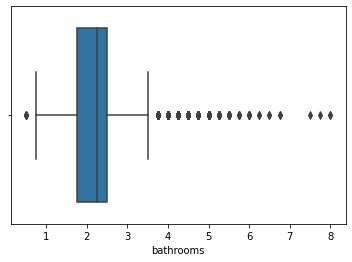

In [ ]:
#Let us visualize this using Box plot for bathrooms
sns.boxplot(df['bathrooms'])

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


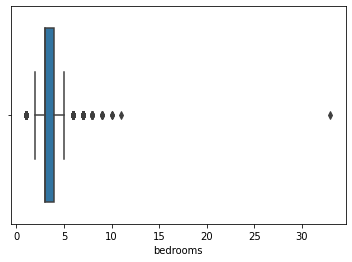

In [ ]:
#Let us visualize this using Box plot for bedrooms
sns.boxplot(df['bedrooms'])

plt.show()

## here we get mean 2.11 and median of 2.25 for bathrooms and mode is 2.5
## here we get mean	3.37 and median of 3.000 for Bedroom and mode is 3.0

##Here we had mean , meadian, mode values vary close so we can consider any to replace for null values


In [ ]:
#replaceing bedrooms nnull values with median values
median=df['bedrooms'].median()
df['bedrooms'].replace(np.nan,median, inplace=True)

In [ ]:
#replaceing bathroom nnull values with median values
median=df['bathrooms'].median()
df['bathrooms'].replace(np.nan,median, inplace=True)

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# now we see there are no null values
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


# Module 3: Exploratory Data Analysis


In [ ]:
df.describe(include='all')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.400881e+05,3.372646,2.115798,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,NaN,3.671272e+05,0.926423,0.768823,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,NaN,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [ ]:
#Use the method value_counts to count the number of houses with unique floor values
df.floors.unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [ ]:
b=df.floors.value_counts()
b

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

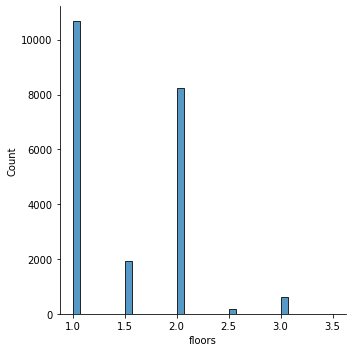

In [ ]:
sns.displot(df.floors)

In [ ]:
#Use the method value_counts to count the bedrooms of houses
df.bedrooms.unique()


array([ 3.,  2.,  4.,  5.,  1.,  6.,  7.,  8.,  9., 11., 10., 33.])

In [ ]:
a=df.bedrooms.value_counts()
a

3.0     9837
4.0     6882
2.0     2760
5.0     1601
6.0      272
1.0      199
7.0       38
8.0       13
9.0        6
10.0       3
11.0       1
33.0       1
Name: bedrooms, dtype: int64

<BarContainer object of 12 artists>

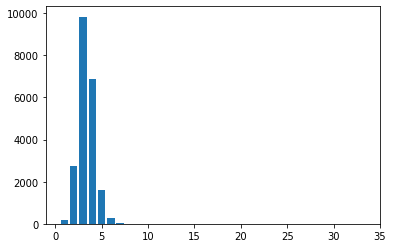

In [ ]:
plt.bar(a.index, a )

In [ ]:
#Use the method value_counts to count the waterfront of houses
df.waterfront.unique()

array([0, 1])

In [ ]:
c=df.waterfront.value_counts()
c

0    21450
1      163
Name: waterfront, dtype: int64

([<matplotlib.patches.Wedge at 0x7f7c8f0800d0>,
 [Text(-1.0996912625289312, 0.026060067488889404, '0'),
  Text(1.0996912610039797, -0.026060131839218025, '1')],
 [Text(-0.5998315977430533, 0.014214582266666945, '99.25%'),
  Text(0.5998315969112615, -0.014214617366846195, '0.75%')])

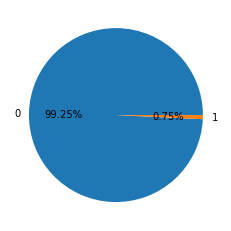

In [ ]:
plt.pie(x=c, labels=c.index, autopct='%1.2f%%')

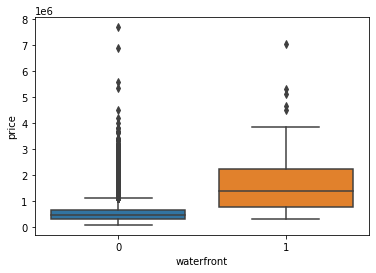

In [ ]:
#using Boxplot we can see taht price of house with waterfront is relatively more than house without waterfront
sns.boxplot(x ='waterfront', y = 'price', data = df)

In [ ]:
#Use the method value_counts to count the view of houses
df.view.unique()

array([0, 3, 4, 2, 1])

In [ ]:
d=df.view.value_counts()
d

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

([<matplotlib.patches.Wedge at 0x7f7c8839e7c0>,
 [Text(-1.0479897705728087, 0.33424159043235785, '0'),
  Text(0.9769630759838076, -0.5055127576671604, '2'),
  Text(1.0620653331221095, -0.2863865013931748, '3'),
  Text(1.0890841991976294, -0.15458203989486735, '1'),
  Text(1.0988176827528706, -0.0509872539916758, '4')],
 [Text(-0.5716307839488046, 0.1823135947812861, '90.17%'),
  Text(0.5328889505366222, -0.27573423145481474, '4.46%'),
  Text(0.5793083635211506, -0.15621081894173167, '2.36%'),
  Text(0.5940459268350705, -0.08431747630629127, '1.54%'),
  Text(0.599355099683384, -0.027811229450004978, '1.48%')])

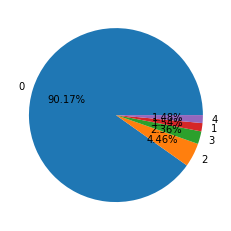

In [ ]:
plt.pie(x=d, labels=d.index, autopct='%1.2f%%')

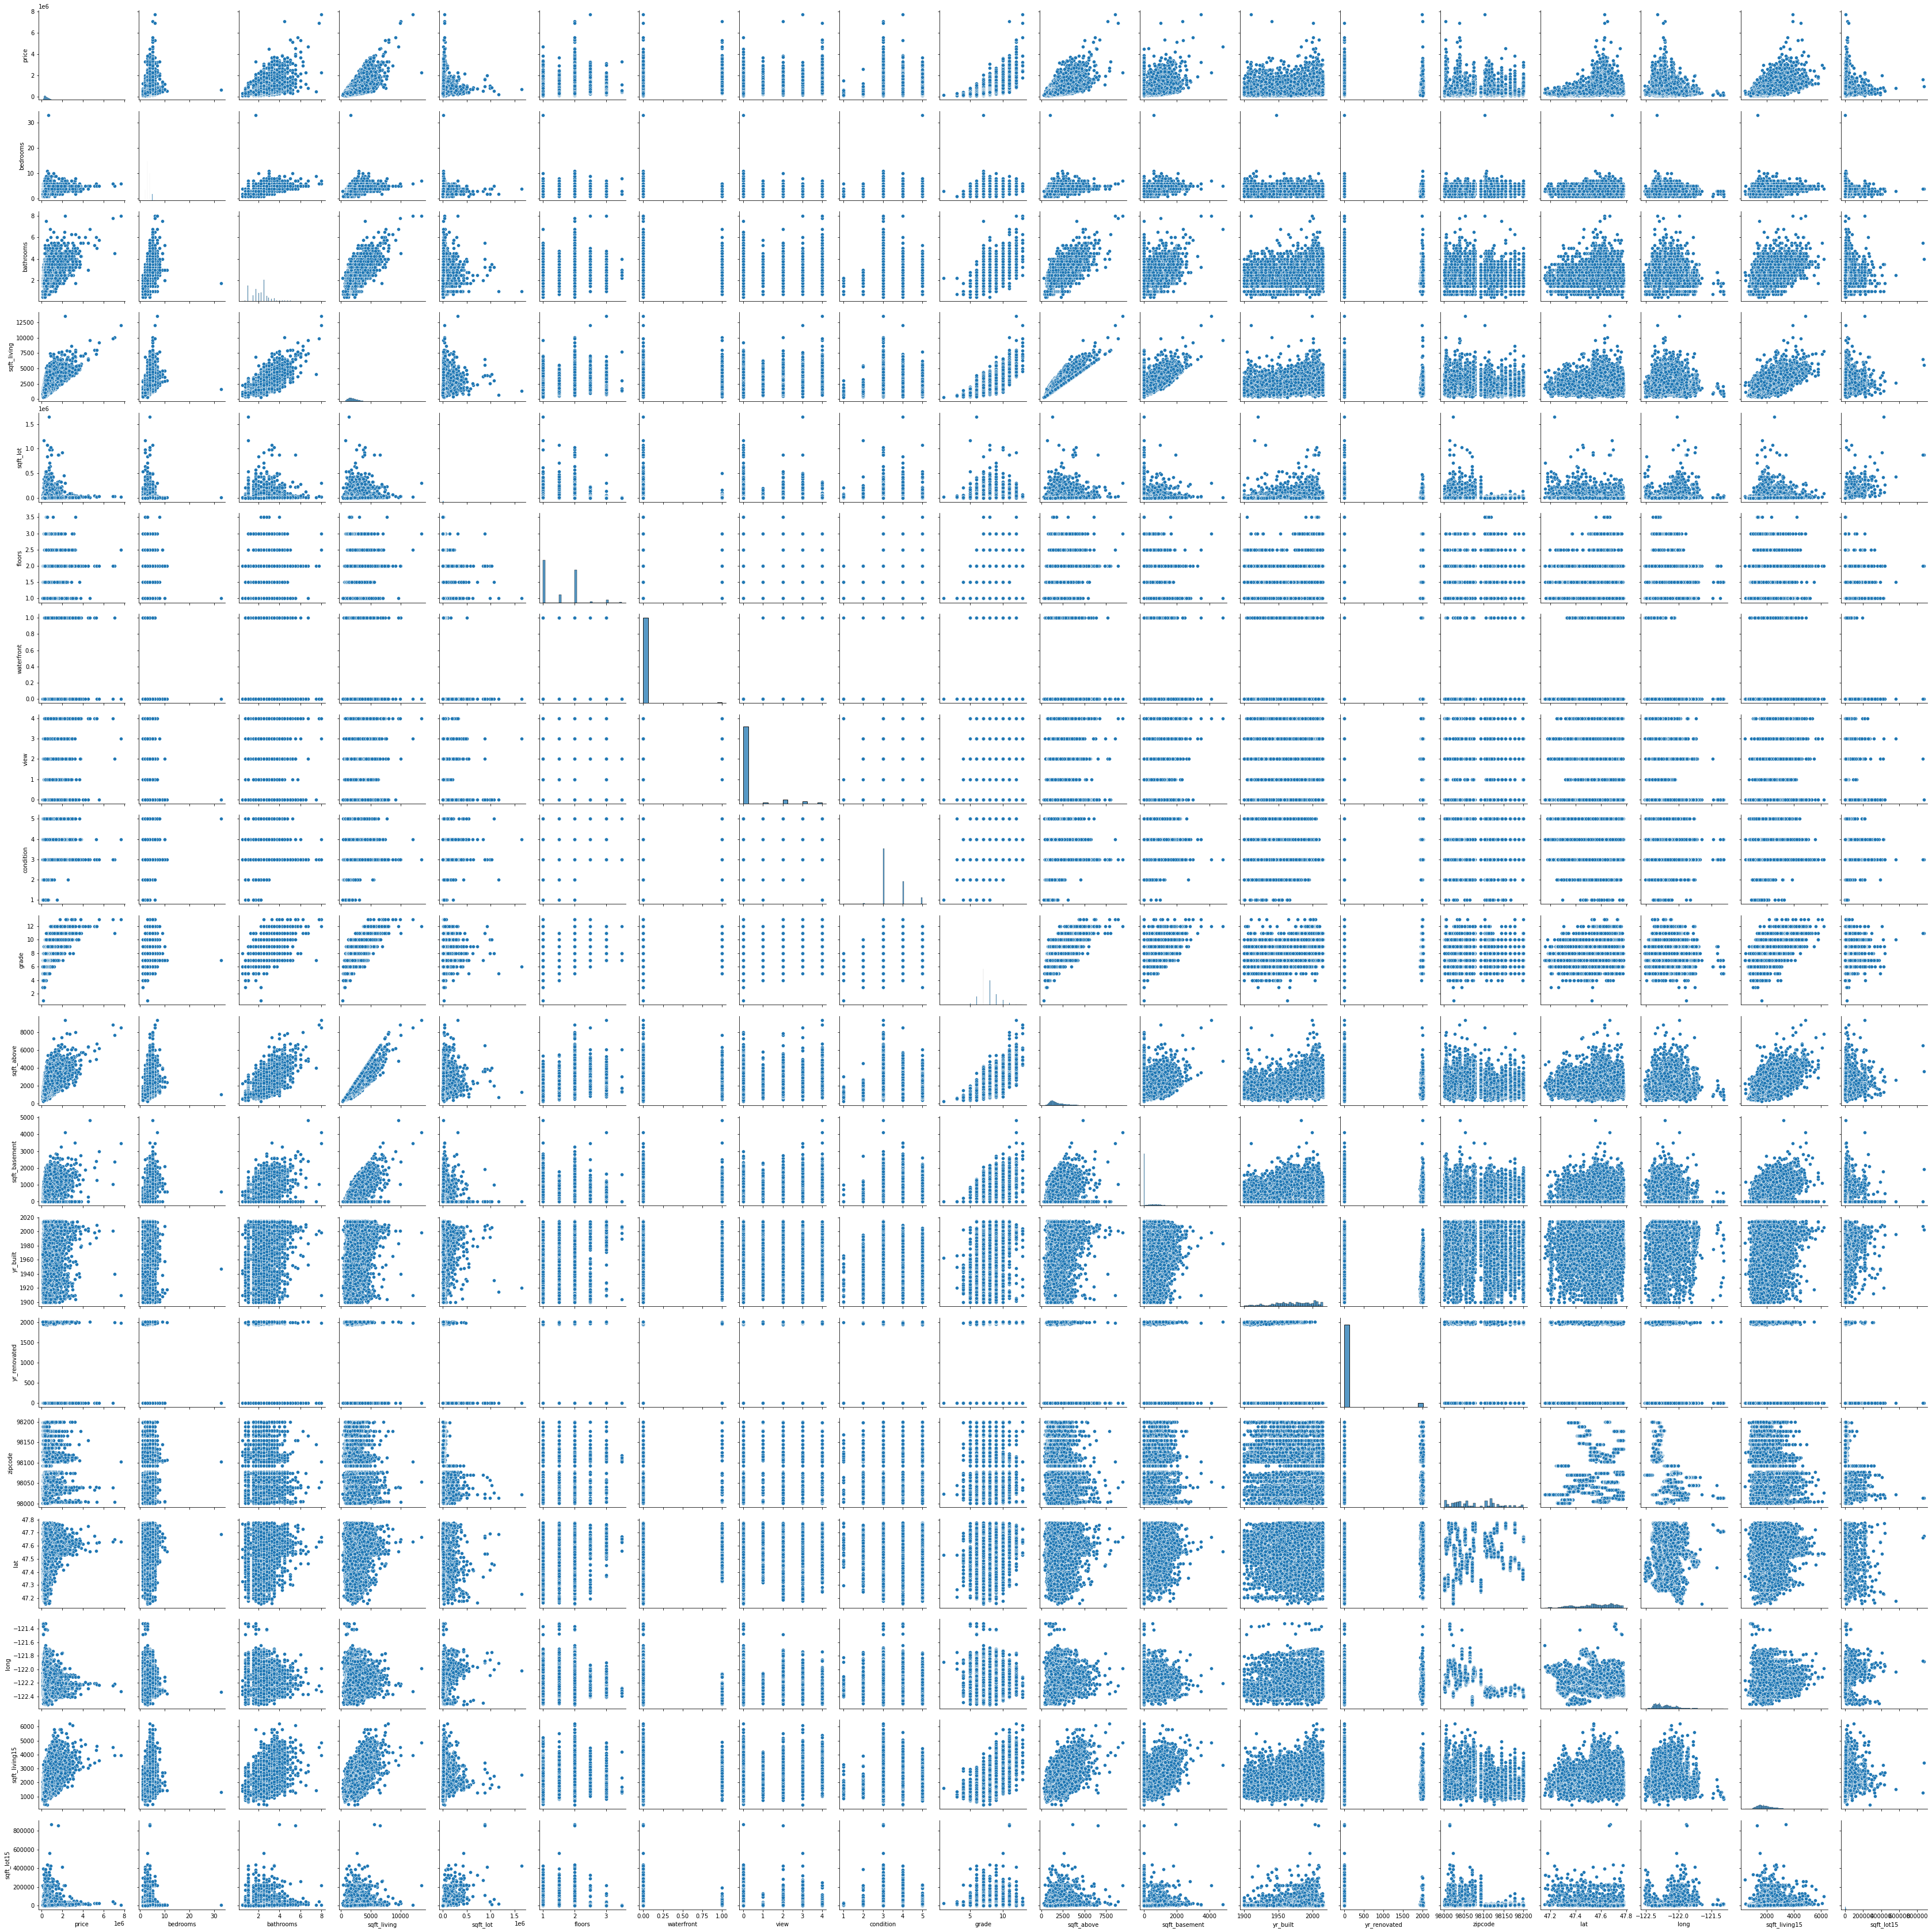

In [ ]:
sns.pairplot(data=df)

(0.0, 8081250.0)

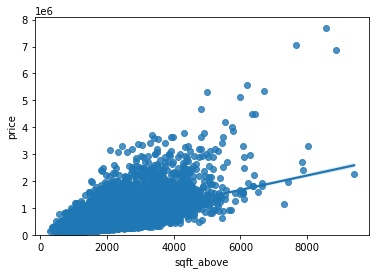

In [ ]:
#Useing regplot to determine if the feature sqft_above is negatively or positively correlated with price.
sns.regplot(x="sqft_above", y="price", data=df)
plt.ylim(0,)

In [ ]:
#sqft_above and	price showes corrilation of 0.605567, which is positive so these are dirctly praportional and sqft_above can affect price
df[['sqft_above','price']].corr()

,sqft_above,price
sqft_above,1.000000,0.605567
price,0.605567,1.000000


In [ ]:
#We can use corr() to find the feature that are most correlated with price.
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308868
sqft_basement    0.323816
view             0.397293
bathrooms        0.525714
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

we see that following columns show more corrilation with price
bathrooms        0.525714

sqft_living15    0.585379

sqft_above       0.605567

grade            0.667434

sqft_living      0.702035

#Module 4: Model Development

In [ ]:
import sklearn

from sklearn.model_selection import train_test_split

import statsmodels

import statsmodels.api as sm

In [ ]:
#We can Fit a linear regression model using the longitude feature 'long' and caculate the R^2.
#Method1(gives only R^2 value)
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

In [ ]:
#Method 2:
x_train, x_test, y_train, y_test = train_test_split(df['long'], df.price, test_size = 0.2)

x_train=sm.add_constant(x_train)

mod1=sm.OLS(y_train,x_train).fit()

print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     7.083
Date:                Sun, 01 Jan 2023   Prob (F-statistic):            0.00779
Time:                        12:04:46   Log-Likelihood:            -2.4620e+05
No. Observations:               17290   AIC:                         4.924e+05
Df Residuals:                   17288   BIC:                         4.924e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.015e+06   2.43e+06      2.884      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


###R^2 is 0.000467694301 which is very less so this model is not great fit and p-value 0.008 is <0.05 so HO is rejected 
### so we can say that change in long also affect the Price

#Multiple Linear Regression

In [ ]:
#Cheking Multiple linear regression model to predict the 'price' using the list of features:
features =df[["price","floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features.drop('price', axis=1), features.price, test_size=0.2)

x_train=sm.add_constant(x_train)

mod2=sm.OLS(y_train, x_train).fit()


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     3308.
Date:                Sun, 01 Jan 2023   Prob (F-statistic):               0.00
Time:                        12:20:23   Log-Likelihood:            -2.3678e+05
No. Observations:               17290   AIC:                         4.736e+05
Df Residuals:                   17279   BIC:                         4.737e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.214e+07   5.73e+05    -56.059

we have considered "floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living" as predictor variable to Price as Responce veriable.
From P-Value Model suggest that bathrooms=>0.088  and
sqft_living15 => 0.369 which is >0.05 so 'bathroom' and sqft_living15  HO is not rejected so , it does not affect the price parameter.
In other hand P-value for "floors", "waterfront","lat","sqft_basement" ,"view" ,"bathrooms","sqft_above","grade","sqft_living" are <0.05 so we can say that change in this parameters affect the Responce variable 'Price as well.